# بسم الله الرحمن الرحيم

In [1]:
# import pandas as pd 
# import numpy as np 
# from matplotlib import pyplot as plt 
# import seaborn as sns 
# plt.style.use('default')
# #-------------------------------------------------------------------------------------
# from sklearn.utils import resample 
# from sklearn import preprocessing
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_validate

# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.pipeline import Pipeline 

# import tensorflow_addons as tfa
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers 
# from focal_loss import SparseCategoricalFocalLoss

# #-------------------------------------------------------------------------------------

# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint
# #-------------------------------------------------------------------------------------
# from imblearn.over_sampling import SMOTE
# from utils import *
# %matplotlib inline

In [2]:
from utils import *
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import tensorflow.keras 
import pickle 
import seaborn as sns 
from matplotlib import pyplot as plt 


2023-05-16 13:03:04.049028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 13:03:04.231560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-16 13:03:04.231582: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-16 13:03:05.171799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Reading the Dataset, cleaning , preparing it for the training 

In [4]:
df = pd.read_csv("dataset/body_level_classification_train.csv")

In [5]:
df_original= cleaning_data(df).copy()

In [6]:
all_class_train,all_class_test=data_spliting(df_original,1/3)

In [7]:
X_train=all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train=all_class_train["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()

In [8]:
X_train, scaler= data_scaling(X_train)
with open(f"scaler","wb") as fp : 
    pickle.dump(scaler,fp)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)

In [10]:
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [23]:
model=build_model(7,0.01)

In [24]:
history = model.fit(X_train,Y_train,validation_data=[X_val,Y_val] 
             ,batch_size=32, epochs=300 , verbose =1, 
                       callbacks=[CustomCallback("NNModels/before_sampling/before_samplingmaster.h5")])

Epoch 1/300
31/31 [==============================] - 1s 10ms/step - loss: 0.5574 - accuracy: 0.4736 - val_loss: 0.2834 - val_accuracy: 0.5837
Epoch 2/300
31/31 [==============================] - 0s 3ms/step - loss: 0.1513 - accuracy: 0.6389 - val_loss: 0.0951 - val_accuracy: 0.7143
Epoch 3/300
29/31 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.7478
Yes You are here 0.749492883682251 0.7428571581840515
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-05-15 06:09:57        17192
config.json                    

File Name                                             Modified             Size
variables.h5                                   2023-05-15 06:09:59        17192
config.json                                    2023-05-15 06:09:59         1588
metadata.json                                  2023-05-15 06:09:59           64
31/31 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.8895 - val_loss: 0.0218 - val_accuracy: 0.8898
Epoch 21/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.8813 - val_loss: 0.0211 - val_accuracy: 0.8857
Epoch 22/300
 1/31 [..............................] - ETA: 0s - loss: 0.0123 - accuracy: 0.8438
Yes You are here 0.8904665112495422 0.8979591727256775
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
..........

File Name                                             Modified             Size
variables.h5                                   2023-05-15 06:10:02        17192
config.json                                    2023-05-15 06:10:02         1588
metadata.json                                  2023-05-15 06:10:02           64
31/31 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9432 - val_loss: 0.0113 - val_accuracy: 0.9429
Epoch 49/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9381 - val_loss: 0.0114 - val_accuracy: 0.9388
Epoch 50/300
21/31 [===================>..........] - ETA: 0s - loss: 0.0051 - accuracy: 0.9330
Yes You are here 0.9371196627616882 0.9428571462631226
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
..........

variables.h5                                   2023-05-15 06:10:04        17192
config.json                                    2023-05-15 06:10:04         1588
metadata.json                                  2023-05-15 06:10:04           64
31/31 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 0.9544 - val_loss: 0.0096 - val_accuracy: 0.9551
Epoch 65/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9412 - val_loss: 0.0095 - val_accuracy: 0.9633
Epoch 66/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9432 - val_loss: 0.0093 - val_accuracy: 0.9592
Epoch 67/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.9483 - val_loss: 0.0093 - val_accuracy: 0.9633
Epoch 68/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.9554 - val_loss: 0.0091 - val_accuracy: 0.9469
Epoch 69/300
31/31 [==============================] - 0s 4ms/st

Epoch 91/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.9635 - val_loss: 0.0074 - val_accuracy: 0.9755
Epoch 92/300
30/31 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9615
Yes You are here 0.9614604711532593 0.9714285731315613
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-05-15 06:10:07        17192
config.json                                    2023-05-15 06:10:07         1588
metadata.json                                  2023-05-15 06:10:07           64
31/31 [===

metadata.json                                  2023-05-15 06:10:09           64
31/31 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9736 - val_loss: 0.0062 - val_accuracy: 0.9796
Epoch 115/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9706 - val_loss: 0.0061 - val_accuracy: 0.9755
Epoch 116/300
 1/31 [..............................] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Yes You are here 0.9736308455467224 0.9795918464660645
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                           

variables.h5                                   2023-05-15 06:10:11        17192
config.json                                    2023-05-15 06:10:11         1588
metadata.json                                  2023-05-15 06:10:11           64
31/31 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 0.9757 - val_loss: 0.0060 - val_accuracy: 0.9796
Epoch 133/300
25/31 [=======================>......] - ETA: 0s - loss: 0.0013 - accuracy: 0.9800    
Yes You are here 0.9726166129112244 0.9795918464660645
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5      

config.json                                    2023-05-15 06:10:13         1588
metadata.json                                  2023-05-15 06:10:13           64
31/31 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 0.9767 - val_loss: 0.0057 - val_accuracy: 0.9796
Epoch 143/300
 1/31 [..............................] - ETA: 0s - loss: 0.0021 - accuracy: 0.9375
Yes You are here 0.9797160029411316 0.9795918464660645
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-05-15 06:10:13        17192
config.json           

26/31 [========================>.....] - ETA: 0s - loss: 9.6521e-04 - accuracy: 0.9784
Yes You are here 0.9787018299102783 0.9836734533309937
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-05-15 06:10:17        17192
config.json                                    2023-05-15 06:10:17         1588
metadata.json                                  2023-05-15 06:10:17           64
31/31 [==============================] - 0s 5ms/step - loss: 9.6360e-04 - accuracy: 0.9787 - val_loss: 0.0061 - val_accuracy: 0.9837
Epoch 174/300
29/31 [=======

metadata.json                                  2023-05-15 06:10:18           64
31/31 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 0.9807 - val_loss: 0.0058 - val_accuracy: 0.9878
Epoch 185/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.9787 - val_loss: 0.0058 - val_accuracy: 0.9673
Epoch 186/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9645 - val_loss: 0.0050 - val_accuracy: 0.9755
Epoch 187/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9544 - val_loss: 0.0076 - val_accuracy: 0.9592
Epoch 188/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9351 - val_loss: 0.0076 - val_accuracy: 0.9306
Epoch 189/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9300 - val_loss: 0.0060 - val_accuracy: 0.9551
Epoch 190/300
31/31 [==============================] - 0s 3ms/step - loss: 0

File Name                                             Modified             Size
variables.h5                                   2023-05-15 06:10:21        17192
config.json                                    2023-05-15 06:10:21         1588
metadata.json                                  2023-05-15 06:10:21           64
31/31 [==============================] - 0s 5ms/step - loss: 5.8373e-04 - accuracy: 0.9899 - val_loss: 0.0047 - val_accuracy: 0.9878
Epoch 210/300
31/31 [==============================] - 0s 3ms/step - loss: 5.8577e-04 - accuracy: 0.9888 - val_loss: 0.0048 - val_accuracy: 0.9796
Epoch 211/300
 1/31 [..............................] - ETA: 0s - loss: 5.3898e-04 - accuracy: 1.0000
Yes You are here 0.9898580312728882 0.9877551198005676
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
..........

In [25]:
accurate_train_accuracy,classify_report= test_model(model,X_train,Y_train)

31/31 [==============================] - 0s 966us/step


In [26]:
accurate_train_accuracy

0.9908722109533469

In [27]:
print(classify_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       127
           1       0.98      0.95      0.97       134
           2       0.99      0.99      0.99       271
           3       1.00      1.00      1.00       454

    accuracy                           0.99       986
   macro avg       0.99      0.99      0.99       986
weighted avg       0.99      0.99      0.99       986



In [28]:
accurate_val_accuracy,classify_report= test_model(model,X_val,Y_val)

8/8 [==============================] - 0s 1ms/step


In [29]:
accurate_val_accuracy

0.9755102040816327

In [30]:
print(classify_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      0.97      0.97        31
           2       0.95      0.99      0.97        73
           3       0.99      0.97      0.98       112

    accuracy                           0.98       245
   macro avg       0.98      0.97      0.97       245
weighted avg       0.98      0.98      0.98       245



In [31]:
accurate_test_accuracy,classify_report= test_model(model,X_test,Y_test)

8/8 [==============================] - 0s 1ms/step


In [32]:
accurate_test_accuracy

0.983739837398374

In [33]:
print(classify_report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.95      1.00      0.97        36
           2       0.97      1.00      0.98        62
           3       1.00      0.98      0.99       114

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



## important-Note
gamma=1 on-test(0.967479674796748) on-val(0.9836734693877551)
gamma=2 on-test(0.967479674796748) on-val(0.9836734693877551) 
gamma=3 on-test(0.975609756097561) on-val(0.9836734693877551)

In [57]:
## I can't consider observations in the  age to be false outlier 
## I will consider it a true outlier, I will just make a log transformation for it 
## bc it's so skewed , it have skewness value 1.481576 

# you can't do log transformation in the Time_E_DEV column 


# meal_Count log transforamtion has increase the skewness 





In [59]:
df.skew().sort_values(ascending=False)

/tmp/ipykernel_71849/4024944668.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=False)


Age              1.481576
Time_E_Dev       0.635904
Phys_Act         0.464398
Weight           0.263981
Height          -0.026199
Water_Consump   -0.100632
Veg_Consump     -0.482316
Meal_Count      -1.059333
dtype: float64

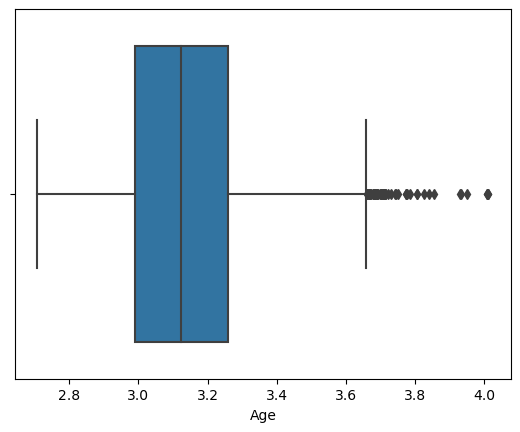

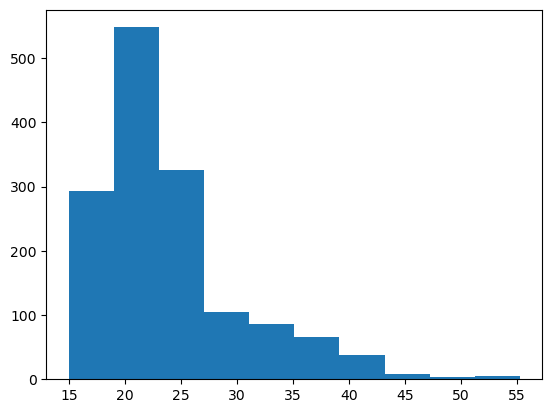

In [60]:
df_temp= df.copy()

sns.boxplot(x=np.log(df_temp["Age"]))
plt.show()

df_temp[df_temp["Age"] < df_temp["Age"].quantile(0.25)]


plt.hist(df_temp["Age"])
plt.show()

In [73]:
# pd.Series(np.log(df_temp["Time_E_Dev"])).skew()

df_temp=df.copy()

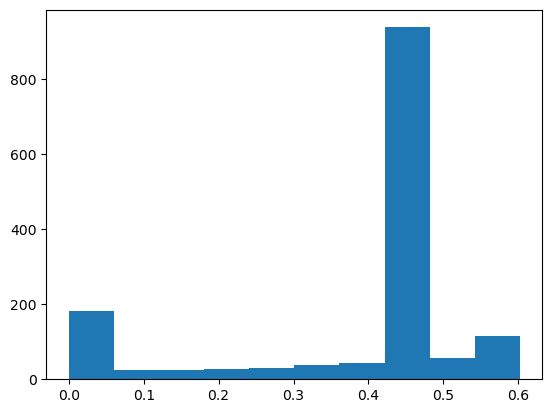

In [81]:
plt.hist(np.log10(df_temp["Meal_Count"]))
plt.show()

In [82]:
pd.Series(np.log10(df_temp["Meal_Count"])).skew()

-1.5087471573946512

In [116]:
pd.Series(X_train[:,14]).skew()

5.686992462368272

In [117]:
X_train[:,14]

array([-0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
       -0.17096069, -0.17096069, -0.17096069, -0.17096069, -0.17096069,
        5.84929788, -0.17096069, -0.17096069, -0.17096069, -0.17